In [1]:
import pandas as pd
import numpy as np
import glob
import pickle
import seaborn as sns; sns.set()
from datetime import datetime
from matplotlib import pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, ShuffleSplit
from sklearn import tree

In [ ]:
# ! pip install imblearn

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


# This section reads all data files and writes into a single dataframe, then deletes unwated column and writes cleaned dataframe into a csv

In [ ]:
# all_year_h1_df = pd.DataFrame()
# for f in glob.glob("..\FinalProject_ML\data\H*.xlsx"):
#     df = pd.read_excel(f)
#     all_year_h1_df = all_year_h1_df.append(df,ignore_index=True)

In [ ]:
# #list of columns to be deleted
# dr_col=["AGENT_ATTORNEY_CITY","AGENT_ATTORNEY_NAME", "AGENT_ATTORNEY_STATE",
#        "AGENT_REPRESENTING_EMPLOYER","CASE_NUMBER","EMPLOYER_PROVINCE", "EMPLOYER_PHONE_EXT",
#         "AGENT_REPRESENTING_EMPLOYER","AGENT_ATTORNEY_NAME","AGENT_ATTORNEY_CITY",
#         "AGENT_ATTORNEY_STATE","SOC_CODE","NAICS_CODE","LABOR_CON_AGREE",
#         "PUBLIC_DISCLOSURE_LOCATION","ORIGINAL_CERT_DATE","EMPLOYER_ADDRESS1", "EMPLOYER_ADDRESS2","EMPLOYER_BUSINESS_DBA",
#         "EMPLOYER_PHONE","EMPLOYER_PHONE_EXT","EMPLOYER_POSTAL_CODE", "EMPLOYER_PROVINCE", "EMPLOYER_STATE",
#         "LCA_CASE_WORKLOC1_CITY","LCA_CASE_WORKLOC1_STATE", "LCA_CASE_WORKLOC2_CITY","CHANGE_EMPLOYER",
#        "CHANGE_PREVIOUS_EMPLOYMENT", "CONTINUED_EMPLOYMENT", "DECISION_DATE",
#        "EMPLOYER_ADDRESS", "EMPLOYER_CITY", "EMPLOYER_COUNTRY","FULL_TIME_POS",'LCA_CASE_EMPLOYER_ADDRESS',
#        'LCA_CASE_EMPLOYER_CITY', 'LCA_CASE_EMPLOYER_POSTAL_CODE', 'LCA_CASE_EMPLOYER_STATE',       
#        'LCA_CASE_JOB_TITLE', 'LCA_CASE_NAICS_CODE', 'LCA_CASE_NUMBER',
#        'LCA_CASE_SOC_CODE', 'LCA_CASE_SOC_NAME', 'LCA_CASE_SUBMIT',
#        'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO',
#        'LCA_CASE_WAGE_RATE_UNIT', 'LCA_CASE_WORKLOC2_STATE', 'NAIC_CODE',
#         'NEW_CONCURRENT_EMP', 'NEW_CONCURRENT_EMPLOYMENT', 'NEW_EMPLOYMENT',
#        'OTHER_WAGE_SOURCE_1', 'OTHER_WAGE_SOURCE_2','PW_1',
#        'PW_2', 'PW_SOURCE', 'PW_SOURCE_1', 'PW_SOURCE_2', 'PW_SOURCE_OTHER',
#        'PW_SOURCE_YEAR', 'PW_UNIT_1', 'PW_UNIT_2','PW_WAGE_LEVEL', 'PW_WAGE_SOURCE', 'PW_WAGE_SOURCE_OTHER',
#        'PW_WAGE_SOURCE_YEAR', 'SOC_NAME', 'STATUS', 'SUPPORT_H1B',
#        'TOTAL WORKERS', 'TOTAL_WORKERS', 'WAGE_RATE_OF_PAY',
#        'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY','WORKSITE_COUNTY', 'WORKSITE_POSTAL_CODE', 'WORKSITE_STATE',
#        'YR_SOURCE_PUB_1', 'YR_SOURCE_PUB_2','H-1B_DEPENDENT','AMENDED_PETITION','CASE_SUBMITTED','WORKSITE_CITY']


# #delete/drop columns from above list
# all_year_h1_df = all_year_h1_df.drop(dr_col,axis=1)
# all_year_h1_df.drop( all_year_h1_df[ all_year_h1_df['EMPLOYMENT_START_DATE'] == '09/31/2015' ].index , inplace=True)

In [ ]:
# all_year_h1_df.to_csv("alldata.csv")

# Loading csv saved above

In [3]:
all_year_h1_df = pd.read_csv("alldata.csv")

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,5,6,7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
all_year_h1_df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,PREVAILING_WAGE,PW_UNIT_OF_PAY,VISA_CLASS,WILLFUL_VIOLATOR
0,0,WITHDRAWN,"MEDTRONIC, INC.",02/28/2015,02/09/2015,Y,NaN,MECHANICAL ENGINEER,19000.00,Year,H-1B,N
1,1,CERTIFIED,UNIVERSITY OF OKLAHOMA,01/04/2018,01/05/2015,Y,NaN,ASSISTANT PROFESSOR,42860.00,Year,H-1B,N
2,2,WITHDRAWN,NOKIA INC.,01/06/2016,01/07/2013,Y,NaN,RELEASE AND SOFTWARE TEST MANAGER,73965.00,Year,H-1B,N
3,3,CERTIFIED,"OMRON OILFIELD AND MARINE, INC.",09/07/2018,09/07/2015,Y,NaN,CONTROL ENGINEERING SPECIALIST,65998.00,Year,H-1B,N
4,4,CERTIFIED,FEDERAL HOME LOAN MORTGAGE CO.,06/05/2018,06/06/2015,Y,NaN,DEVELOPMENT SENIOR,96907.00,Year,H-1B,N
5,5,WITHDRAWN,"APLARS, LLC",01/25/2016,01/25/2015,Y,NaN,BUSINESS ANALYST,20000.00,Year,H-1B,N
6,6,CERTIFIED,"VMWARE, INC.",11/02/2017,11/03/2014,Y,NaN,STAFF ENGINEER,133976.00,Year,H-1B,N
7,7,CERTIFIED,FEDERAL HOME LOAN MORTGAGE CORPORATION,06/13/2018,06/14/2015,Y,NaN,CREDIT GUARANTEE ANALYTICS SENIOR,64085.00,Year,H-1B,N
8,8,CERTIFIED,"VMWARE, INC.",11/16/2017,11/17/2014,Y,NaN,PROGRAMMER/ANALYST - SENIOR APPLICATIONS DEVEL...,101900.00,Year,H-1B,N
9,9,DENIED,IMAEX TRADING COMPANY,09/17/2018,09/17/2015,N,NaN,COST ACCOUNTANT,22.46,Hour,H-1B,N


In [5]:
all_year_h1_df['CASE_STATUS'].unique()

array(['WITHDRAWN', 'CERTIFIED', 'DENIED', 'CERTIFIED-WITHDRAWN', nan],
      dtype=object)

In [6]:
all_year_h1_df = all_year_h1_df.drop(all_year_h1_df[all_year_h1_df.CASE_STATUS == 'WITHDRAWN'].index)
all_year_h1_df = all_year_h1_df.drop(all_year_h1_df[all_year_h1_df.CASE_STATUS == 'CERTIFIED-WITHDRAWN'].index)
all_year_h1_df.loc[all_year_h1_df['CASE_STATUS'].isna(), 'CASE_STATUS'] = "DENIED"

In [7]:
all_year_h1_df.CASE_STATUS.value_counts() / len(all_year_h1_df)

CERTIFIED    0.801058
DENIED       0.198942
Name: CASE_STATUS, dtype: float64

In [8]:
all_year_h1_df['WILLFUL_VIOLATOR'].unique()

array(['N', nan, 'Y'], dtype=object)

In [9]:
all_year_h1_df['FULL_TIME_POSITION'].unique()

array(['Y', 'N', nan], dtype=object)

In [10]:
all_year_h1_df['VISA_CLASS'].unique()

array(['H-1B', 'H-1B1 Chile', 'H-1B1 Singapore', 'E-3 Australian'],
      dtype=object)

In [11]:
all_year_h1_df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYMENT_END_DATE',
       'EMPLOYMENT_START_DATE', 'FULL_TIME_POSITION', 'H1B_DEPENDENT',
       'JOB_TITLE', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'VISA_CLASS',
       'WILLFUL_VIOLATOR'],
      dtype='object')

In [12]:
del all_year_h1_df['Unnamed: 0']

In [13]:
all_year_h1_df['H1B_DEPENDENT'].unique()

array([nan, 'Y', 'N'], dtype=object)

In [14]:
all_year_h1_df['CASE_STATUS'] = np.where(all_year_h1_df['CASE_STATUS'].str.contains("CERTIFIED"), 1,0) 

In [15]:
all_year_h1_df.VISA_CLASS.unique()

array(['H-1B', 'H-1B1 Chile', 'H-1B1 Singapore', 'E-3 Australian'],
      dtype=object)

In [16]:
all_year_h1_df.PW_UNIT_OF_PAY.unique()

array(['Year', 'Hour', 'Week', 'Month', nan, 'Bi-Weekly'], dtype=object)

In [17]:
conditions = [
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Hour")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Month")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Week")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Bi-Weekly")) & (all_year_h1_df['PREVAILING_WAGE']>0 )]
     
choices = [(all_year_h1_df['PREVAILING_WAGE'] * 2000), 
           (all_year_h1_df['PREVAILING_WAGE'] * 12), 
           (all_year_h1_df['PREVAILING_WAGE'] * 50),
            (all_year_h1_df['PREVAILING_WAGE'] * 25)]
all_year_h1_df['PWAGE'] = np.select(conditions, choices, default = all_year_h1_df['PREVAILING_WAGE'])

In [18]:
del all_year_h1_df['PREVAILING_WAGE']
del all_year_h1_df['PW_UNIT_OF_PAY']

In [19]:
all_year_h1_df['PWAGE'] = all_year_h1_df['PWAGE'].fillna(all_year_h1_df['PWAGE'].mean())

In [22]:
all_year_h1_df.shape

(2798881, 10)

In [23]:
all_year_h1_df.head(10)

,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,VISA_CLASS,WILLFUL_VIOLATOR,PWAGE
1,1,UNIVERSITY OF OKLAHOMA,01/04/2018,01/05/2015,Y,NaN,ASSISTANT PROFESSOR,H-1B,N,42860.0
3,1,"OMRON OILFIELD AND MARINE, INC.",09/07/2018,09/07/2015,Y,NaN,CONTROL ENGINEERING SPECIALIST,H-1B,N,65998.0
4,1,FEDERAL HOME LOAN MORTGAGE CO.,06/05/2018,06/06/2015,Y,NaN,DEVELOPMENT SENIOR,H-1B,N,96907.0
6,1,"VMWARE, INC.",11/02/2017,11/03/2014,Y,NaN,STAFF ENGINEER,H-1B,N,133976.0
7,1,FEDERAL HOME LOAN MORTGAGE CORPORATION,06/13/2018,06/14/2015,Y,NaN,CREDIT GUARANTEE ANALYTICS SENIOR,H-1B,N,64085.0
8,1,"VMWARE, INC.",11/16/2017,11/17/2014,Y,NaN,PROGRAMMER/ANALYST - SENIOR APPLICATIONS DEVEL...,H-1B,N,101900.0
9,0,IMAEX TRADING COMPANY,09/17/2018,09/17/2015,N,NaN,COST ACCOUNTANT,H-1B,N,44920.0
10,1,"VMWARE, INC.",04/22/2018,04/23/2015,Y,NaN,MEMBER OF TECHNICAL STAFF - SOFTWARE ENGINEERING,H-1B,N,98557.0
11,0,"LHB, INC.",01/22/2016,01/22/2015,Y,NaN,F,H-1B,N,345000.0
12,0,"INTERNATIONAL SOLUTIONS GROUP, INC.",08/20/2018,08/20/2015,Y,NaN,PROGRAMMER ANALYST,H-1B,N,66976.0


In [24]:
all_year_h1_df.describe()

,CASE_STATUS,PWAGE
count,2.798881e+06,2.798881e+06
mean,8.010584e-01,1.015873e+05
std,3.992041e-01,1.917182e+06
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,6.223400e+04
50%,1.000000e+00,7.887400e+04
75%,1.000000e+00,1.015873e+05
max,1.000000e+00,1.000000e+09


In [25]:
all_year_h1_df = all_year_h1_df[all_year_h1_df.EMPLOYMENT_START_DATE != '09/31/2015']

In [26]:
all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYMENT_START_DATE"])
all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYMENT_END_DATE"])

In [27]:
def try_parsing_date(text):
    for fmt in ('%Y/%m/%d', '%d/%m/%Y', '%m/%d/%Y','%Y-%m-%d %H:%M:%S'):
        try:            
            return pd.to_datetime(text).strftime(fmt)
        except ValueError:
            pass
            raise ValueError(text)
    
    
all_year_h1_df['EmpStart_date'] = all_year_h1_df['EMPLOYMENT_START_DATE'].apply(lambda x: try_parsing_date(x))
all_year_h1_df['EmpEnd_date'] = all_year_h1_df['EMPLOYMENT_END_DATE'].apply(lambda x: try_parsing_date(x))

In [28]:
del all_year_h1_df['EMPLOYMENT_START_DATE']
del all_year_h1_df['EMPLOYMENT_END_DATE']

In [29]:
all_year_h1_df['EMPLOYMENT_DAYS'] = pd.to_datetime(all_year_h1_df['EmpEnd_date']) - pd.to_datetime(all_year_h1_df['EmpStart_date'])

In [30]:
def caldays(d):
    return np.where(d.days > 182.5, 1,0) 

all_year_h1_df['EMPDAYS'] = all_year_h1_df['EMPLOYMENT_DAYS'].apply(lambda x: caldays(x))

In [31]:
del all_year_h1_df['EMPLOYMENT_DAYS']

In [32]:
del all_year_h1_df['EmpStart_date']
del all_year_h1_df['EmpEnd_date']

In [33]:
for col in all_year_h1_df.columns:
    print(col,len(all_year_h1_df.loc[all_year_h1_df[col].isna()]))

CASE_STATUS 0
EMPLOYER_NAME 86
FULL_TIME_POSITION 1098348
H1B_DEPENDENT 1681992
JOB_TITLE 519505
VISA_CLASS 0
WILLFUL_VIOLATOR 568326
PWAGE 0
EMPDAYS 0


In [34]:
all_year_h1_df.dtypes

CASE_STATUS             int32
EMPLOYER_NAME          object
FULL_TIME_POSITION     object
H1B_DEPENDENT          object
JOB_TITLE              object
VISA_CLASS             object
WILLFUL_VIOLATOR       object
PWAGE                 float64
EMPDAYS                 int64
dtype: object

In [35]:
category_cols =['FULL_TIME_POSITION','H1B_DEPENDENT','WILLFUL_VIOLATOR','VISA_CLASS']

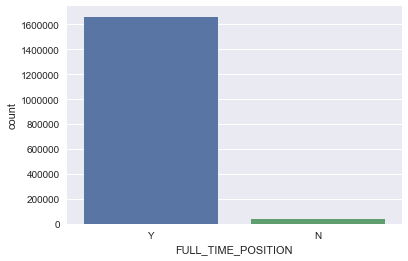

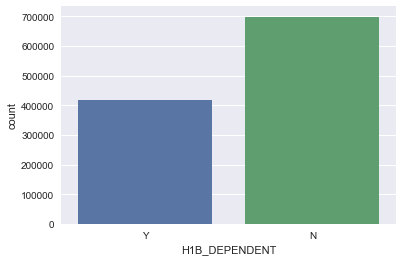

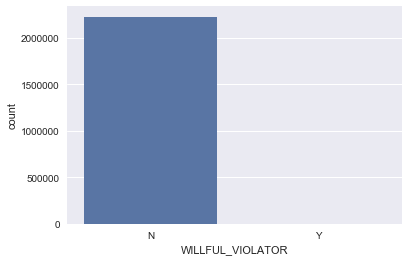

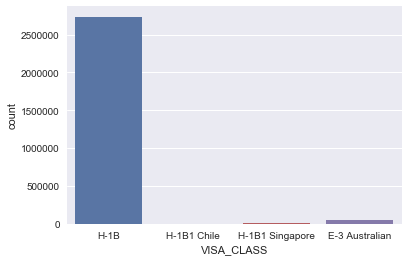

In [36]:
for col in category_cols:
    sns.countplot(col, data=all_year_h1_df)
    plt.show()

In [37]:
# dump a pickle of your DataFrame
all_year_h1_df.to_pickle("cleandata.pkl")